In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

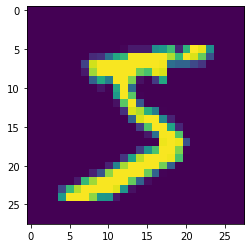

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

5

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
x_train.min(), x_train.max()

(0, 255)

In [9]:
y_train.min(), y_train.max()

(0, 9)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [12]:
x_test.min(), x_test.max()

(0.0, 1.0)

In [13]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [14]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [15]:
#buil the model - first define the object
model = tf.keras.models.Sequential()

In [16]:
#add first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [17]:
#add second layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [18]:
#adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [19]:
#add drop out layer
model.add(tf.keras.layers.Dropout(0.4))

In [20]:
#flatten layer
model.add(tf.keras.layers.Flatten())


In [21]:
#fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))



In [22]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [37]:
#train the model
modelhist = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 140s 299ms/step - loss: 0.0106 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0318 - val_sparse_categorical_accuracy: 0.9912
Epoch 2/10
469/469 [==============================] - 142s 302ms/step - loss: 0.0071 - sparse_categorical_accuracy: 0.9976 - val_loss: 0.0279 - val_sparse_categorical_accuracy: 0.9916
Epoch 3/10
469/469 [==============================] - 141s 301ms/step - loss: 0.0077 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.0365 - val_sparse_categorical_accuracy: 0.9909
Epoch 4/10
469/469 [==============================] - 141s 301ms/step - loss: 0.0059 - sparse_categorical_accuracy: 0.9980 - val_loss: 0.0370 - val_sparse_categorical_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 142s 302ms/step - loss: 0.0056 - sparse_categorical_accuracy: 0.9981 - val_loss: 0.0377 - val_sparse_categorical_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 140s 299ms/step - loss: 0.

In [38]:
#model predictions
y_pred = model.predict_classes(x_test)

In [39]:
y_pred[9500], y_test[9500]

(2, 2)

In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score


In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[ 978,    0,    1,    0,    0,    0,    0,    0,    0,    1],
       [   0, 1121,    0,    0,    0,    3,    3,    1,    7,    0],
       [   1,    1, 1018,    1,    1,    0,    1,    7,    2,    0],
       [   0,    0,    0, 1002,    0,    7,    0,    1,    0,    0],
       [   0,    0,    0,    0,  977,    0,    2,    0,    0,    3],
       [   1,    0,    0,    4,    0,  886,    1,    0,    0,    0],
       [   4,    1,    0,    0,    1,    1,  947,    0,    4,    0],
       [   0,    3,    4,    0,    0,    0,    0, 1019,    1,    1],
       [   1,    0,    2,    1,    0,    0,    0,    1,  967,    2],
       [   0,    0,    0,    0,    5,    3,    0,    5,    2,  994]])

In [43]:
acc_cm = accuracy_score(y_test, y_pred)

In [44]:
acc_cm

0.9909

In [54]:
#Learning Curve

def learning_curve(modelhist, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, modelhist.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, modelhist.history['val_sparse_categorical_accuracy'])
  plt.title('Accuracy of DIGIT RECOGNITION')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show();

  plt.plot(epoch_range, modelhist.history['loss'])
  plt.plot(epoch_range, modelhist.history['val_loss'])
  plt.title('model loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show();

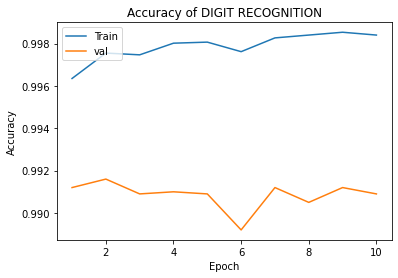

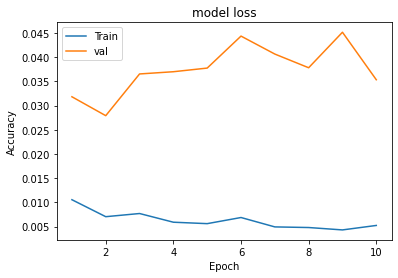

In [55]:
learning_curve(modelhist, 10);

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0.9909


[0.03532896935939789, 0.9908999800682068]

In [58]:
#One has got to check for overfitting in this scenario